### ***Install Libraries***

In [ ]:
import os
import time
import math
import h5py
import pickle
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import xgboost as xgb
import pdb
import gc

from pandas import HDFStore,DataFrame
from sklearn.model_selection import train_test_split
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
from sklearn.model_selection import train_test_split
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,accuracy_score

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### ***Fetching Preprocessed Data***...

In [ ]:
df_final_train = pd.read_csv('/content/df_final_train.csv')
df_final_test = pd.read_csv('/content/df_final_test.csv')

In [ ]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link
df_final_train.drop(['Source_nodes', 'Destination_nodes','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

#***Model***

Estimators =  1 Train Score 0.9833134803455421 test Score 0.9014281180577595
Estimators =  3 Train Score 0.9911385553038353 test Score 0.9200764979089171
Estimators =  5 Train Score 0.9935225107791036 test Score 0.9226879069473418
Estimators =  10 Train Score 0.9956582338136349 test Score 0.9288253981612
Estimators =  50 Train Score 0.9974962945158834 test Score 0.9286452075296696
Estimators =  100 Train Score 0.9976367860289994 test Score 0.9315339177229824
Estimators =  250 Train Score 0.9978174682631853 test Score 0.9315247108307045
Estimators =  450 Train Score 0.9978174682631853 test Score 0.9318669302266896


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

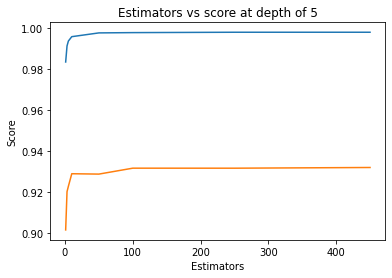

In [ ]:
estimators = [1,3,5,10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, criterion='gini',
             n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8917345504876013 test Score 0.8687351863822452
depth =  9 Train Score 0.960611512619563 test Score 0.9222334682860999
depth =  11 Train Score 0.9647342408037596 test Score 0.9263953000419639
depth =  15 Train Score 0.97535901112884 test Score 0.927949393779652
depth =  20 Train Score 0.9844775034819644 test Score 0.9323064621341245
depth =  35 Train Score 0.9974762143214823 test Score 0.9312338385855741
depth =  50 Train Score 0.9976769800740963 test Score 0.9315143361641302
depth =  70 Train Score 0.9976870162509637 test Score 0.9314947554284994
depth =  130 Train Score 0.9976870162509637 test Score 0.9314947554284994


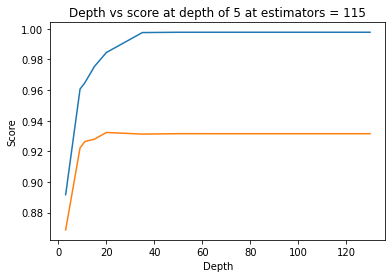

In [ ]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i,  n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier( )
clf.fit(df_final_train.values,y_train.values)
train_sc = f1_score(y_train,clf.predict(df_final_train.values))
test_sc = f1_score(y_test,clf.predict(df_final_test.values))
print('Using XGBoost we got ; Training_Score:',train_sc,'& Test Score:',test_sc)

Using XGBoost we got ; Training_Score: 0.9733685585011085 & Test Score: 0.9261349172677132


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
param_grid = {
        'max_depth': [3,5, 11, 17, 23],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_by': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [10,50,100,250,450]}
clf = xgb.XGBClassifier( )
train_scores = []
test_scores = []
search = RandomizedSearchCV(clf, param_grid, n_iter=10,
                            n_jobs=-1, verbose=1, cv=2,
                            scoring='f1', random_state=42,return_train_score=True)
search.fit(df_final_train.values,y_train)

In [ ]:
final_clf = search.best_estimator_
print(final_clf)

XGBClassifier(colsample_by=1.0, max_depth=11, n_estimators=250, reg_lambda=0.1,
              subsample=0.5)


In [ ]:
final_clf.fit(df_final_train.values,y_train)
train_sc = f1_score(y_train,final_clf.predict(df_final_train.values))
test_sc = f1_score(y_test,final_clf.predict(df_final_test.values))

print('Train Score',train_sc,'& Test Score',test_sc)

Train Score 1.0 & Test Score 0.9244463373083475


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


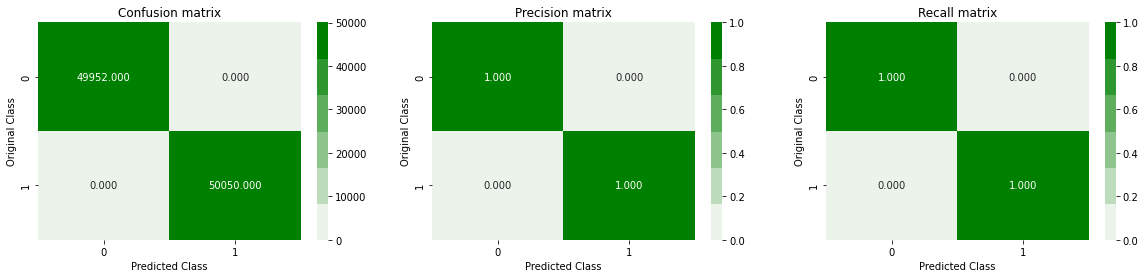

Test confusion_matrix


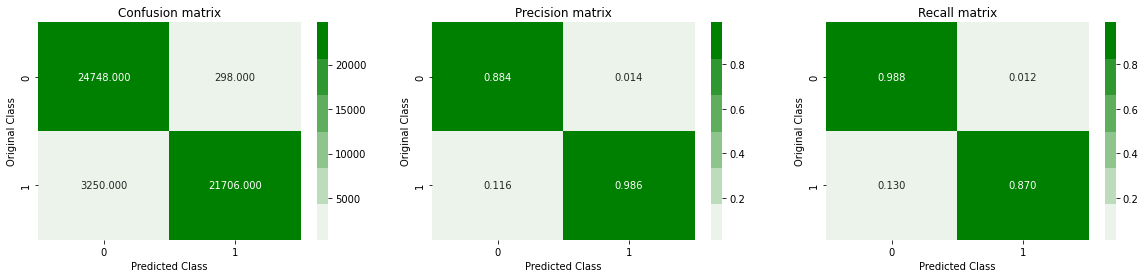

In [ ]:
y_train_pred = final_clf.predict(df_final_train.values)
y_test_pred = final_clf.predict(df_final_test.values)
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

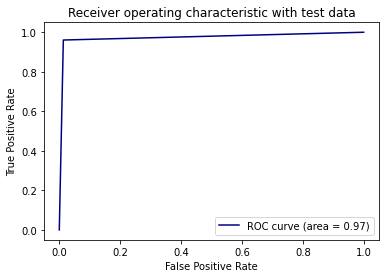

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_train,clf.predict(df_final_train.values))
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()